In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import os
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

os.getcwd()

'C:\\Users\\Dell\\Documents\\Jupyter'

In [3]:
os.chdir("E:\\analytics_assignment")

In [4]:
PrednActuals=pd.read_pickle("data_model_vald.pkl")

PrednActuals.sort_values(by="Prob",ascending=False,inplace=True)

labels=["D10","D9","D8","D7","D6","D5","D4","D3","D2","D1"]

PrednActuals["Deciles_lbl"]=pd.qcut(PrednActuals.Prob,q=10,precision=1,labels=labels)

pd.value_counts(PrednActuals.Deciles_lbl,sort=False)

In [9]:
temp=PrednActuals.groupby(by="Deciles_lbl",as_index=False).agg({"Actuals":["count","sum"]})

temp.columns=["Deciles_lbl","count","events"]

temp["Events_Per"]=temp.events/temp["count"]

temp

## Ranking

In [13]:
fig = plt.figure()
ax = fig.gca()

x=np.array(labels)

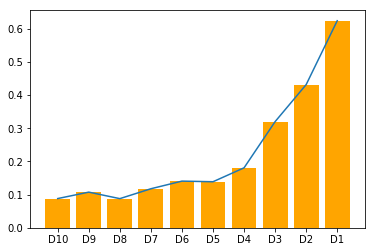

In [15]:
plt.xticks(range(len(x)), x)
ax.bar(range(len(x)),temp.Events_Per,color="orange")
ax.plot(range(len(x)), temp.Events_Per)
plt.show()

# KS

In [16]:
temp.sort_values(by="Deciles_lbl",ascending=False,inplace=True)

temp.drop("Events_Per",inplace=True,axis=1)

temp["NonEvents"]=temp["count"]-temp["events"]

temp["Events%"]=temp["events"]/(temp["events"].sum())
temp["Cum%Events"]=temp["Events%"].cumsum()

temp["NonEvents%"]=temp["NonEvents"]/(temp["NonEvents"].sum())
temp["Cum%NonEvents"]=temp["NonEvents%"].cumsum()

temp["KS"]=temp["Cum%Events"]-temp["Cum%NonEvents"]

In [22]:
temp

,Deciles_lbl,count,events,NonEvents,Events%,Cum%Events,NonEvents%,Cum%NonEvents,KS
9,D1,2096,1308,788,0.278535,0.278535,0.048332,0.048332,0.230203
8,D2,2104,908,1196,0.193356,0.471891,0.073356,0.121688,0.350203
7,D3,2100,672,1428,0.143101,0.614991,0.087586,0.209274,0.405718
6,D4,2058,372,1686,0.079216,0.694208,0.103410,0.312684,0.381524
5,D5,2118,294,1824,0.062606,0.756814,0.111874,0.424558,0.332256
4,D6,2111,297,1814,0.063245,0.820060,0.111261,0.535819,0.284240
3,D7,2099,247,1852,0.052598,0.872658,0.113592,0.649411,0.223246
2,D8,2037,179,1858,0.038118,0.910775,0.113960,0.763371,0.147404
1,D9,2177,234,1943,0.049830,0.960605,0.119173,0.882544,0.078061
0,D10,2100,185,1915,0.039395,1.000000,0.117456,1.000000,0.000000


## Test Ranking

In [74]:
Test_PrednActuals=pd.read_pickle("Test_data_model_vald.pkl")

Test_PrednActuals.sort_values(by="Prob",ascending=False,inplace=True)

labels=["D10","D9","D8","D7","D6","D5","D4","D3","D2","D1"]

Test_PrednActuals["Deciles_lbl"]=pd.qcut(Test_PrednActuals.Prob,q=10,precision=1,labels=labels)

pd.value_counts(Test_PrednActuals.Deciles_lbl,sort=False)

D10    910
D9     953
D8     846
D7     897
D6     904
D5     901
D4     918
D3     880
D2     901
D1     890
Name: Deciles_lbl, dtype: int64

In [75]:
temp=Test_PrednActuals.groupby(by="Deciles_lbl",as_index=False).agg({"Actuals":["count","sum"]})

temp.columns=["Deciles_lbl","count","events"]

temp["Events_Per"]=temp.events/temp["count"]

temp

,Deciles_lbl,count,events,Events_Per
0,D10,910,72,0.079121
1,D9,953,87,0.091291
2,D8,846,74,0.087470
3,D7,897,98,0.109253
4,D6,904,112,0.123894
5,D5,901,142,0.157603
6,D4,918,144,0.156863
7,D3,880,287,0.326136
8,D2,901,392,0.435072
9,D1,890,532,0.597753


In [76]:
fig = plt.figure()
ax = fig.gca()

x=np.array(labels)

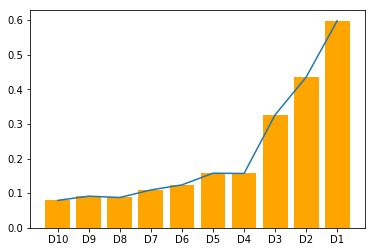

In [77]:
plt.xticks(range(len(x)), x)
ax.bar(range(len(x)),temp.Events_Per,color="orange")
ax.plot(range(len(x)), temp.Events_Per)
plt.show()

## Test KS

In [78]:
temp.sort_values(by="Deciles_lbl",ascending=False,inplace=True)

temp.drop("Events_Per",inplace=True,axis=1)

temp["NonEvents"]=temp["count"]-temp["events"]

temp["Events%"]=temp["events"]/(temp["events"].sum())
temp["Cum%Events"]=temp["Events%"].cumsum()

temp["NonEvents%"]=temp["NonEvents"]/(temp["NonEvents"].sum())
temp["Cum%NonEvents"]=temp["NonEvents%"].cumsum()

temp["KS"]=temp["Cum%Events"]-temp["Cum%NonEvents"]

In [79]:
temp

,Deciles_lbl,count,events,NonEvents,Events%,Cum%Events,NonEvents%,Cum%NonEvents,KS
9,D1,890,532,358,0.274227,0.274227,0.050708,0.050708,2.235186e-01
8,D2,901,392,509,0.202062,0.476289,0.072096,0.122805,3.534841e-01
7,D3,880,287,593,0.147938,0.624227,0.083994,0.206799,4.174279e-01
6,D4,918,144,774,0.074227,0.698454,0.109632,0.316431,3.820230e-01
5,D5,901,142,759,0.073196,0.771649,0.107507,0.423938,3.477118e-01
4,D6,904,112,792,0.057732,0.829381,0.112181,0.536119,2.932625e-01
3,D7,897,98,799,0.050515,0.879897,0.113173,0.649292,2.306051e-01
2,D8,846,74,772,0.038144,0.918041,0.109348,0.758640,1.594010e-01
1,D9,953,87,866,0.044845,0.962887,0.122663,0.881303,8.158348e-02
0,D10,910,72,838,0.037113,1.000000,0.118697,1.000000,-1.110223e-16


In [82]:
pd.options.display.float_format = '{:.4f}'.format

In [83]:
temp

,Deciles_lbl,count,events,NonEvents,Events%,Cum%Events,NonEvents%,Cum%NonEvents,KS
9,D1,890,532,358,0.2742,0.2742,0.0507,0.0507,0.2235
8,D2,901,392,509,0.2021,0.4763,0.0721,0.1228,0.3535
7,D3,880,287,593,0.1479,0.6242,0.0840,0.2068,0.4174
6,D4,918,144,774,0.0742,0.6985,0.1096,0.3164,0.3820
5,D5,901,142,759,0.0732,0.7716,0.1075,0.4239,0.3477
4,D6,904,112,792,0.0577,0.8294,0.1122,0.5361,0.2933
3,D7,897,98,799,0.0505,0.8799,0.1132,0.6493,0.2306
2,D8,846,74,772,0.0381,0.9180,0.1093,0.7586,0.1594
1,D9,953,87,866,0.0448,0.9629,0.1227,0.8813,0.0816
0,D10,910,72,838,0.0371,1.0000,0.1187,1.0000,-0.0000
